In [2]:
%matplotlib ipympl
import indentoolbox as itb
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os

In [6]:
setup = {}

In [7]:
setup["tip"] = itb.core.SpheroConicalTip(angle = 70.3, 
                                         htrunc = 15.e-9, 
                                         young_modulus=1141.0e9, 
                                         poisson_coefficient=0.14)

In [34]:
#protocol = None # If left to None, the test protocol will be inferred by the parser.
protocol = 3 * [None] + ["ConicalLoadingStep", "Step", "UnloadingStep"] # Use your own protocol: None ignores a step and otherwise a class name is provided
protocol

[None, None, None, 'ConicalLoadingStep', 'Step', 'UnloadingStep']

In [35]:
itb.gui.file_processing_widgets(setup, protocol)

In [36]:
itb.gui.date_selection_widget(setup)

DatePicker(value=datetime.date(2023, 7, 5), description='Test date', step=1)

In [37]:
operators = [
    itb.core.Operator(name = "Ludovic Charleux", institute= "Institut de Physique de Rennes"),
    itb.core.Operator(name = "Mariette Nivard", institute= "Institut de Physique de Rennes")]
setup["operators"] = operators
operators

[Operator(name='Ludovic Charleux', institute='Institut de Physique de Rennes'),
 Operator(name='Mariette Nivard', institute='Institut de Physique de Rennes')]

In [38]:
sample = itb.core.Sample(name = "Fused Quartz", provider = "Hysitron")
setup["sample"] = sample
sample

Sample(name='Fused Quartz', provider='Hysitron')

In [39]:
device = itb.core.Device(name = "TI-950", institute = "Institut de Physique de Rennes", compliance = 0., provider = "Hysitron")
setup["device"] = device
device

Device(name='TI-950', institute='Institut de Physique de Rennes', compliance=0.0, provider='Hysitron')

In [40]:
setup

{'tip': SpheroConicalTip(radius=2.413e-07, htrunc=1.50e-08, hcrit=1.41e-08),
 'tests': [Test(3 steps), Test(3 steps), Test(3 steps), Test(3 steps)],
 'date': datetime.date(2023, 7, 5),
 'operators': [Operator(name='Ludovic Charleux', institute='Institut de Physique de Rennes'),
  Operator(name='Mariette Nivard', institute='Institut de Physique de Rennes')],
 'sample': Sample(name='Fused Quartz', provider='Hysitron'),
 'device': Device(name='TI-950', institute='Institut de Physique de Rennes', compliance=0.0, provider='Hysitron')}

In [41]:
batch = itb.core.Batch(**setup)
batch

Batch(4 tests)

In [42]:
batch.dump("my_batch")

## Post processing

In [43]:
root_path = "./my_batch"
batch = itb.core.Batch.load(root_path)
batch

Batch(4 tests)

In [44]:
# TEST DATA
print(batch.tests[0].data)

          time          disp     force  step
0      3.97437  2.476870e-10  0.000003     0
1      3.97937  5.780340e-10  0.000004     0
2      3.98437  1.063623e-09  0.000006     0
3      3.98937  1.633712e-09  0.000008     0
4      3.99437  2.344546e-09  0.000011     0
...        ...           ...       ...   ...
7994  43.94437  1.231350e-07  0.000022     2
7995  43.94937  1.229267e-07  0.000017     2
7996  43.95437  1.226304e-07  0.000012     2
7997  43.95937  1.221842e-07  0.000008     2
7998  43.96437  1.220285e-07  0.000004     2

[7999 rows x 4 columns]


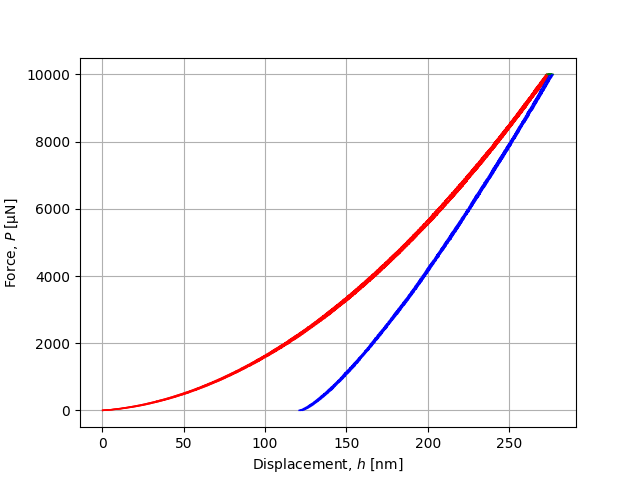

In [45]:
plot_reject = False
colors = "rgb"
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
tests = batch.tests
Ntests = len(tests)
for Nt in range(Ntests):
    test = tests[Nt]
    if plot_reject == False and test.reject == False:
        test_data = test.data
        test_structure = [step.kind() for step in test.steps]
        for step_id, step_data in test_data.groupby("step"):
            ax.plot(
                step_data.disp * 1.0e9,
                step_data.force * 1.0e6,
                "-",
                lw=1.0,
                color=colors[step_id%len(colors)],
            )
            

ax.grid()
ax.set_xlabel("Displacement, $h$ [nm]")
ax.set_ylabel("Force, $P$ [µN]")
#plt.savefig("experimental_batch.png")
plt.show()

In [47]:
loading_data = batch.collect_steps(0).parabolic_fit(displim = 50.e-9, htrunc = batch.tip.htrunc)
loading_data.index = loading_data.index.droplevel(1)
print(loading_data)

                 C        htrunc    Pm            hm  reject             W
test                                                                      
0     1.444014e+11  1.500000e-08  0.01  2.739192e-07     0.0  9.645780e-10
1     1.432250e+11  1.500000e-08  0.01  2.745705e-07     0.0  9.647903e-10
2     1.477416e+11  1.500000e-08  0.01  2.727414e-07     0.0  9.715798e-10
3     1.466159e+11  1.500000e-08  0.01  2.734625e-07     0.0  9.724532e-10
